In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=10,6
import numpy as np
import pandas as pd
import requests
from config import api_key
import eia
import datetime
import re
from sqlalchemy import create_engine
from datetime import datetime

In [2]:
api = eia.API(api_key)

In [3]:
series=['TOTAL.TEICBUS.M','TOTAL.TERCBUS.M','TOTAL.TEACBUS.M','TOTAL.TXCCBUS.M','TOTAL.TXEIBUS.M','TOTAL.TXICBUS.M','TOTAL.TXRCBUS.M','TOTAL.TXACBUS.M','TOTAL.TETCBUS.M']

In [4]:
newdf=api.data_by_series(series='TOTAL.TECCBUS.M')
dataframe1=pd.DataFrame(newdf)
dataframe1.head()

,"Total Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)"
1973 01,1079.310
1973 02,1001.920
1973 03,884.437
1973 04,735.461
1973 05,696.114


In [5]:
for x in series:
    series_search = api.data_by_series(series=x)
    df = pd.DataFrame(series_search)
    dataframe1=dataframe1.join(df, how="outer")


In [6]:
dataframe1

,"Total Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Residential Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Electric Power Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Residential Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)","Total Primary Energy Consumption, Monthly (Trillion Btu)"
1973 01,1079.310,2701.524,1932.187,1509.552,656.607,1691.096,2054.675,1313.816,1506.380,7226.265
1973 02,1001.920,2460.752,1687.255,1442.127,621.766,1511.458,1869.459,1150.011,1439.361,6594.709
1973 03,884.437,2579.613,1497.067,1564.016,490.154,1559.159,1944.295,970.362,1561.162,6524.198
1973 04,735.461,2550.210,1177.661,1482.632,362.003,1470.152,1924.207,709.631,1479.971,5944.336
1973 05,696.114,2741.810,1015.008,1624.436,289.109,1551.631,2070.447,544.596,1621.585,6074.551
1973 06,687.473,2641.221,933.663,1543.553,227.897,1709.752,1942.080,385.648,1540.532,5805.318
1973 07,693.949,2691.487,981.183,1587.202,197.526,1846.331,1999.819,326.179,1583.965,5954.498
1973 08,706.301,2817.613,1018.978,1649.550,206.942,1889.873,2111.198,338.036,1646.394,6194.365
1973 09,651.041,2661.997,956.550,1505.857,210.244,1664.842,2035.699,361.672,1502.988,5776.048
1973 10,693.462,2911.515,991.668,1580.742,266.381,1638.807,2232.462,461.932,1577.804,6177.455


In [7]:
dataframe1=dataframe1.reset_index()
dataframe1=dataframe1.rename(columns={"index":"Time"})
dataframe1.head()

,Time,"Total Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Residential Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Electric Power Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Residential Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)","Total Primary Energy Consumption, Monthly (Trillion Btu)"
0,1973 01,1079.310,2701.524,1932.187,1509.552,656.607,1691.096,2054.675,1313.816,1506.380,7226.265
1,1973 02,1001.920,2460.752,1687.255,1442.127,621.766,1511.458,1869.459,1150.011,1439.361,6594.709
2,1973 03,884.437,2579.613,1497.067,1564.016,490.154,1559.159,1944.295,970.362,1561.162,6524.198
3,1973 04,735.461,2550.210,1177.661,1482.632,362.003,1470.152,1924.207,709.631,1479.971,5944.336
4,1973 05,696.114,2741.810,1015.008,1624.436,289.109,1551.631,2070.447,544.596,1621.585,6074.551


In [8]:
dataframe1["Time"][0]

'1973 01 '

In [9]:

year = re.findall('....', (dataframe1['Time'][0]))[0]
month = re.findall('....', (dataframe1['Time'][0]))[1]

print(f"year = {year}")
print(f"month = {month}")

year = 1973
month =  01 


In [10]:
year = []
month = []
counter = 0

In [11]:
for time in dataframe1['Time']:
    year.append(re.findall('....', (dataframe1['Time'][counter]))[0])
    month.append(re.findall('....', (dataframe1['Time'][counter]))[1])
    counter = counter + 1


In [12]:
dataframe1['Year'] = year
dataframe1['Month'] = month

In [13]:
dataframe1['Time'] = dataframe1['Time'].str.strip()

In [14]:
dataframe1.head()

,Time,"Total Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Residential Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Electric Power Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Residential Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)","Total Primary Energy Consumption, Monthly (Trillion Btu)",Year,Month
0,1973 01,1079.310,2701.524,1932.187,1509.552,656.607,1691.096,2054.675,1313.816,1506.380,7226.265,1973,01
1,1973 02,1001.920,2460.752,1687.255,1442.127,621.766,1511.458,1869.459,1150.011,1439.361,6594.709,1973,02
2,1973 03,884.437,2579.613,1497.067,1564.016,490.154,1559.159,1944.295,970.362,1561.162,6524.198,1973,03
3,1973 04,735.461,2550.210,1177.661,1482.632,362.003,1470.152,1924.207,709.631,1479.971,5944.336,1973,04
4,1973 05,696.114,2741.810,1015.008,1624.436,289.109,1551.631,2070.447,544.596,1621.585,6074.551,1973,05


In [25]:
dataframe2 = dataframe1[['Year', 'Total Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)']].copy()

In [26]:
dataframe2.head()

,Year,"Total Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)"
0,1973,1079.310
1,1973,1001.920
2,1973,884.437
3,1973,735.461
4,1973,696.114


In [27]:
df3=dataframe2.set_index(["Year"])
df3.head()

,"Total Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)"
Year,
1973,1079.310
1973,1001.920
1973,884.437
1973,735.461
1973,696.114


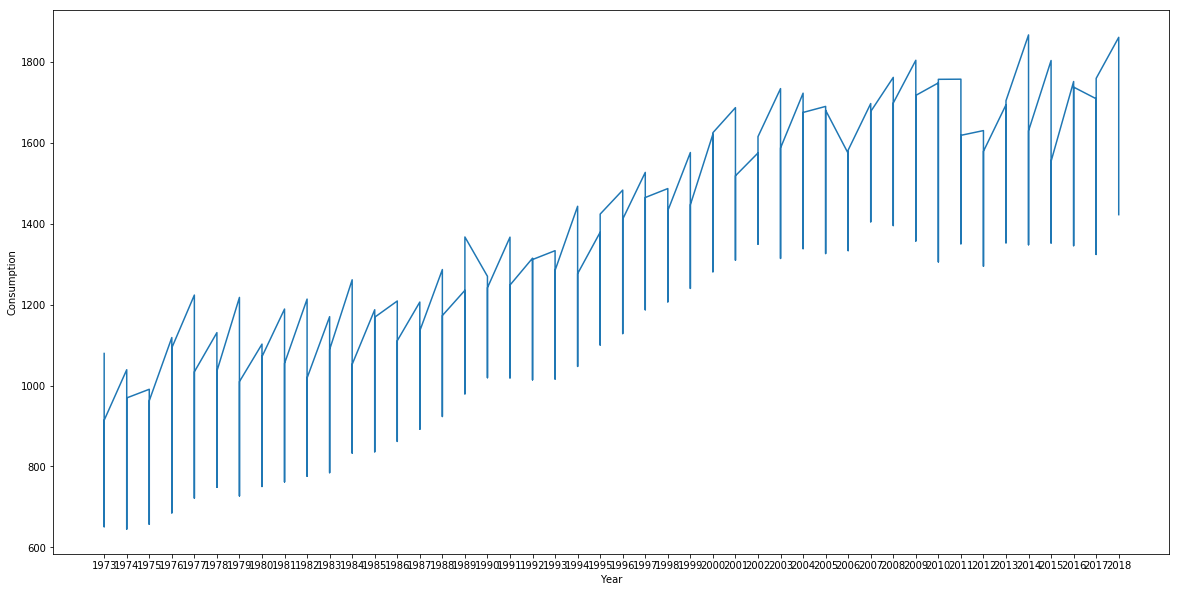

In [48]:
plt.figure(figsize=(20,10))
plt.xlabel("Year")
plt.ylabel("Consumption")
plt.plot(df3)

In [29]:
rollmean=df3.rolling(window=12).mean()
rollstd=df3.rolling(window=12).std()
# print(rollmean, rollstd)

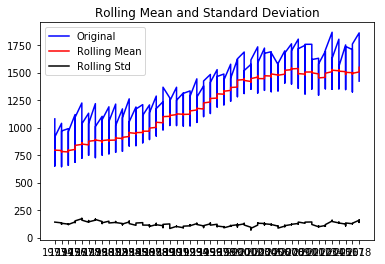

In [31]:
orig=plt.plot(df3, color="blue", label="Original")
mean=plt.plot(rollmean, color="red", label="Rolling Mean")
std=plt.plot(rollstd, color="black", label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

In [32]:
from statsmodels.tsa.stattools import adfuller
print("Results of Dickey Fuller Test")
dftest=adfuller(df3["Total Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)"], autolag="AIC")
dfoutput=pd.Series(dftest[0:4], index=["Test Statistic", "P-Value",'# Lags Used',"# of Obsv Used"])
for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)"%key]=value
print(dfoutput)

# from this we know the data is not stationary 

Results of Dickey Fuller Test
Test Statistic           -1.137083
P-Value                   0.700059
# Lags Used              14.000000
# of Obsv Used          534.000000
Critical Value (1%)      -3.442655
Critical Value (5%)      -2.866968
Critical Value (10%)     -2.569661
dtype: float64


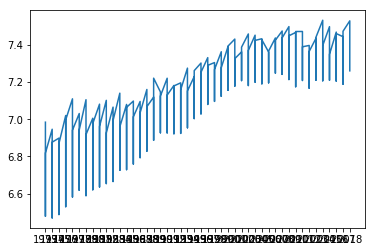

In [33]:
df3_logScale=np.log(df3)
plt.plot(df3_logScale)

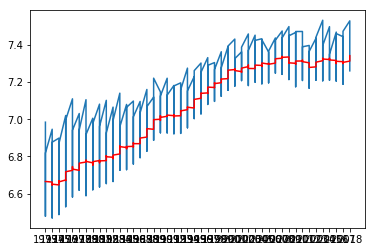

In [34]:
movingAverage=df3_logScale.rolling(window=12).mean()
movingStd=df3_logScale.rolling(window=12).std()
plt.plot(df3_logScale)
plt.plot(movingAverage, color="red")

# the data is still not stationary

In [35]:
datasetLogScaleMinusMovingAverage=df3_logScale-movingAverage
datasetLogScaleMinusMovingAverage.head()
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head()

,"Total Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)"
Year,
1973,0.152764
1974,0.283897
1974,0.157064
1974,0.109020
1974,-0.028456


In [36]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage=timeseries.rolling(window=12).mean()
    movingStd=timeseries.rolling(window=12).mean()
    orig=plt.plot(timeseries, color="blue", label="Original")
    mean=plt.plot(movingAverage, color="red", label="Rolling Mean")
    std=plt.plot(movingStd, color="black", label="Rolling STD")
    plt.legend(loc="best")
    plt.title("Rolling Mean and STD")
    plt.show(block=False)
    print("Results of Dickey Fuller test:")
    dfoutput=pd.Series(dftest[0:4], index=["Test Statistic", "P-Value",'# Lags Used',"# of Obsv Used"])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key]=value
    print(dfoutput)

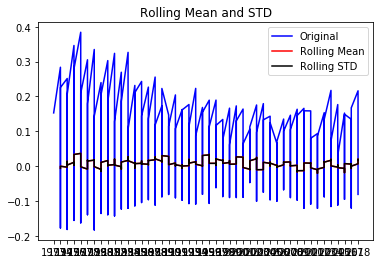

Results of Dickey Fuller test:
Test Statistic           -1.137083
P-Value                   0.700059
# Lags Used              14.000000
# of Obsv Used          534.000000
Critical Value (1%)      -3.442655
Critical Value (5%)      -2.866968
Critical Value (10%)     -2.569661
dtype: float64


In [37]:
test_stationarity(datasetLogScaleMinusMovingAverage)

In [38]:
X=dataframe1[["Total Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)",'Total Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)','Total Energy Consumed by the Residential Sector, Monthly (Trillion Btu)','Total Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)']]
y=dataframe1["Year"].values.reshape(-1, 1)
print(X.shape, y.shape)

(549, 4) (549, 1)


In [39]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [40]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

/Users/julia/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [41]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

/Users/julia/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/julia/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [42]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

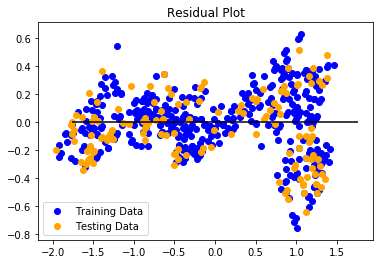

In [43]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [44]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.06181970516920095, R2: 0.9507814332444844


In [45]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.06867667243251703, R2: 0.9453221690816065


In [46]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.061836546650568196, R2: 0.9507680246788391


In [47]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.06959699046319896, R2: 0.9445894458454562
